Walmart Sales Data Analytics Capstone 2025

This project highlights walmart sales based on the top ten spenders, top selling products, age, and holidays vs non-holidays. 

Import packages to run the notebook. 

In [173]:
import os
import pandas as pd
import zipfile
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

Get the current working directory. This should display as a path. 

In [174]:
base_dir = os.getcwd()

print (f"Base Directory: {base_dir}") # this will be unique to your environment or machine

Base Directory: c:\Users\Kyisha\OneDrive\Walmart Sales Data Analytics Capstone 2025


This is the relative ZIP file path for Dataset 1. 

In [175]:
# Data Cleaning and Preprocessing Script
# Dataset 1
# Define the relative ZIP file path
zip_file_path = os.path.join(base_dir, "Dataset_1.zip")

This verifies the extracted_files directory where raw data will be stored. 

In [176]:
# ensure extraction directory exists
extract_dir = os.path.join(base_dir, "extracted_files")
os.makedirs(extract_dir, exist_ok=True)

This opens the ZIP file and verifies the correct files are present. 

In [177]:
# Open the ZIP file and extract contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction Complete. Files are stored in:", extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
print("Extracted Files:")
for file in extracted_files:
    print(file)

Extraction Complete. Files are stored in: c:\Users\Kyisha\OneDrive\Walmart Sales Data Analytics Capstone 2025\extracted_files
Extracted Files:
walmart.csv
Walmart_Sales.csv


Load the first csv walmart.csv file. 

In [178]:
# Load the CSV file into a DataFrame
df = pd.read_csv(os.path.join(extract_dir, "walmart.csv"))

# Display the first few rows
print(df.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969  


There are no missing values. 

In [179]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:\n", missing_values)

Missing values in each column:
 User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


Check for duplicate rows. There are none. 

In [180]:
# Check for duplicate rows
print(df.duplicated().sum())

0


Conversion to integers eliminates mixed data types and keeps data clean. 

In [181]:
# Convert 'Stay_In_Current_City_Years' to numeric, replacing '4+' with 4
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years']. replace('4+', 4).astype(int)

print("Data types after conversion:\n", df.dtypes)

Data types after conversion:
 User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object


Treat Age column as a string before conversion (ex. 0,1,2,3....17). 

In [182]:
df['Age'] = df['Age'].astype(str).replace(age_mapping)

In [183]:
# Mapping age ranges to their midpoint values
age_mapping = {
    '0-17': 9, '18-25': 21, '26-35': 30, '36-45': 40, 
    '46-50': 48, '51-55': 53, '55+': 55
}

Should display integer values. 

In [184]:
# Verify conversion
print(df['Age'].unique())

[ 9 55 30 48 53 40 21]


Further verifying conversion by checking data type which is 8 integer values. 

In [185]:
print(df.dtypes)  # Check data types after conversion

User_ID                        int64
Product_ID                    object
Gender                        object
Age                            int64
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object


View of cleaning in dataset. 

In [186]:
print(df.head())  # Display first few rows

   User_ID Product_ID Gender  Age  Occupation City_Category  \
0  1000001  P00069042      F    9          10             A   
1  1000001  P00248942      F    9          10             A   
2  1000001  P00087842      F    9          10             A   
3  1000001  P00085442      F    9          10             A   
4  1000002  P00285442      M   55          16             C   

   Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                           2               0                 3      8370  
1                           2               0                 1     15200  
2                           2               0                12      1422  
3                           2               0                12      1057  
4                           4               0                 8      7969  


Save cleaned dataset to a new csv file. 

In [187]:
df.to_csv("cleaned_walmart_data.csv", index=False)

print("Cleaned data saved to 'cleaned_walmart_data.csv'") # output message

Cleaned data saved to 'cleaned_walmart_data.csv'


This is the relative ZIP file path for Dataset 2. 

In [188]:
# Dataset 2
# Define the relative ZIP file path
zip_file_path = os.path.join(base_dir, "Dataset_2.zip")

This opens the ZIP file and verifies the correct files are present. 

In [189]:
# Open the ZIP file and extract contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction Complete. Files are stored in:", extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
print("Extracted Files:")
for file in extracted_files:
    print(file)

Extraction Complete. Files are stored in: c:\Users\Kyisha\OneDrive\Walmart Sales Data Analytics Capstone 2025\extracted_files
Extracted Files:
walmart.csv
Walmart_Sales.csv


Load the second csv file Walmart_Sales.csv.

In [190]:
df = pd.read_csv(os.path.join(extract_dir, "Walmart_Sales.csv"))

# Display the first few rows
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


Check for missing values. There are none. 

In [191]:
missing_values = df.isnull().sum()

print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


Check for duplicate values. There are none. 

In [192]:
# Check for duplicate rows (none found in the dataset)
print(df.duplicated().sum())

0


Print data types prior to conversions. 

In [193]:
print(df.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


Select float columns. 

In [194]:
float_columns = df.select_dtypes(include=['float64']).columns.tolist()

Convert float columns to integers by rounding. 

In [195]:
for col in float_columns:
    df[col] = df[col].round().astype(int)

Verify the conversion. 

In [196]:
print(df.dtypes)

print(df.head())

Store            int64
Date            object
Weekly_Sales     int64
Holiday_Flag     int64
Temperature      int64
Fuel_Price       int64
CPI              int64
Unemployment     int64
dtype: object
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010       1643691             0           42           3   
1      1  12-02-2010       1641957             1           39           3   
2      1  19-02-2010       1611968             0           40           3   
3      1  26-02-2010       1409728             0           47           3   
4      1  05-03-2010       1554807             0           46           3   

   CPI  Unemployment  
0  211             8  
1  211             8  
2  211             8  
3  211             8  
4  211             8  


Save the cleaned dataset to a new CSV file.

In [197]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv("cleaned_walmart_sales_data.csv", index=False)
print("Cleaned sales data saved to 'cleaned_walmart_sales_data.csv'")  # Confirmation message

Cleaned sales data saved to 'cleaned_walmart_sales_data.csv'


Load the cleaned datasets. 

In [198]:
df1 = pd.read_csv(os.path.join(base_dir, "cleaned_walmart_data.csv"))
df2 = pd.read_csv(os.path.join(base_dir, "cleaned_walmart_sales_data.csv"))

Preview the cleaned data. 

In [199]:
# Display the first few rows of dataset 1
print("DataFrame 1:\n", df1.head())

DataFrame 1:
    User_ID Product_ID Gender  Age  Occupation City_Category  \
0  1000001  P00069042      F    9          10             A   
1  1000001  P00248942      F    9          10             A   
2  1000001  P00087842      F    9          10             A   
3  1000001  P00085442      F    9          10             A   
4  1000002  P00285442      M   55          16             C   

   Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                           2               0                 3      8370  
1                           2               0                 1     15200  
2                           2               0                12      1422  
3                           2               0                12      1057  
4                           4               0                 8      7969  


In [200]:
# Display the first few rows of dataset 2
print("DataFrame 2:\n", df2.head())

DataFrame 2:
    Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010       1643691             0           42           3   
1      1  12-02-2010       1641957             1           39           3   
2      1  19-02-2010       1611968             0           40           3   
3      1  26-02-2010       1409728             0           47           3   
4      1  05-03-2010       1554807             0           46           3   

   CPI  Unemployment  
0  211             8  
1  211             8  
2  211             8  
3  211             8  
4  211             8  


Create a new index prior to merging the data. The columns or rows do not share similar names.

In [201]:
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

Merge the datasets.

In [202]:
df_combined = pd.concat([df1, df2], axis=1)

# Display the first few rows of the combined dataset
print(df_combined)

         index  User_ID Product_ID Gender  Age  Occupation City_Category  \
0            0  1000001  P00069042      F    9          10             A   
1            1  1000001  P00248942      F    9          10             A   
2            2  1000001  P00087842      F    9          10             A   
3            3  1000001  P00085442      F    9          10             A   
4            4  1000002  P00285442      M   55          16             C   
...        ...      ...        ...    ...  ...         ...           ...   
550063  550063  1006033  P00372445      M   53          13             B   
550064  550064  1006035  P00375436      F   30           1             C   
550065  550065  1006036  P00375436      F   30          15             B   
550066  550066  1006038  P00375436      F   55           1             C   
550067  550067  1006039  P00371644      F   48           0             B   

        Stay_In_Current_City_Years  Marital_Status  Product_Category  \
0              

Drop rows with NaN values which are empty. 

In [203]:
df_combined.dropna(inplace=True)

print("Data after dropping NaN values:\n", df_combined.head())

Data after dropping NaN values:
    index  User_ID Product_ID Gender  Age  Occupation City_Category  \
0      0  1000001  P00069042      F    9          10             A   
1      1  1000001  P00248942      F    9          10             A   
2      2  1000001  P00087842      F    9          10             A   
3      3  1000001  P00085442      F    9          10             A   
4      4  1000002  P00285442      M   55          16             C   

   Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  \
0                           2               0                 3      8370   
1                           2               0                 1     15200   
2                           2               0                12      1422   
3                           2               0                12      1057   
4                           4               0                 8      7969   

   index  Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
0    0.0   

Customer spending analysis. 

In [204]:
total_spend = df1.groupby("User_ID")["Purchase"].sum()
print("Total spend per user:\n", total_spend)

Total spend per user:
 User_ID
1000001     334093
1000002     810472
1000003     341635
1000004     206468
1000005     821001
            ...   
1006036    4116058
1006037    1119538
1006038      90034
1006039     590319
1006040    1653299
Name: Purchase, Length: 5891, dtype: int64


Average spent based on age group analysis. 

In [205]:
avg_spend_age = df1.groupby("Age")["Purchase"].mean()
print("Average spend by age group:\n", avg_spend_age)

Average spend by age group:
 Age
9     8933.464640
21    9169.663606
30    9252.690633
40    9331.350695
48    9208.625697
53    9534.808031
55    9336.280459
Name: Purchase, dtype: float64


Rounded values for cleaning.

In [206]:
# Round the average spent by age group to the nearest integer
avg_spend_age = df1.groupby("Age")["Purchase"].mean().round(0).astype(int)
print("Average spend by age group (rounded):\n", avg_spend_age)

Average spend by age group (rounded):
 Age
9     8933
21    9170
30    9253
40    9331
48    9209
53    9535
55    9336
Name: Purchase, dtype: int64


Verifying Holiday_Flag column existed due to unexpected error. Total sales listed after verification. $6,231,919,429.00 in sales made on non holiday days!

In [207]:
# Check if 'Holiday_Flag' column exists in df2
if "Holiday_Flag" in df2.columns and "Weekly_Sales" in df2.columns:
    # Total sales holiday and non-holiday
    sales_holiday = df2.groupby("Holiday_Flag")["Weekly_Sales"].sum()
    print("Total sales during holidays:\n", sales_holiday)
else:
    print("Error: 'Holiday_Flag' or 'Weekly_Sales' column is missing in df2.")

Total sales during holidays:
 Holiday_Flag
0    6231919429
1     505299550
Name: Weekly_Sales, dtype: int64


Save combined dataset to new CSV file. 

In [208]:
df_combined.to_csv("combined_data.csv", index=False)
print("Combined data saved to 'combined_walmart_data.csv'")  # Confirmation message

Combined data saved to 'combined_walmart_data.csv'


Import packages for visualizations. 

In [209]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

Column #13 'Store' has a mixed data type so it must be treated as a string prior to visulaization. 

In [210]:
dtype = {'column_name': str}  

Load the combined data CSV file. 

In [211]:

df = pd.read_csv(os.path.join(base_dir, "combined_walmart_data.csv"))

1. Top 10 Selling Products. The highest product made $426,925.00 in revenue. 

In [212]:
# Group by Product ID and the purchase amounts
top_products = df.groupby("Product_ID")["Purchase"].sum().sort_values(ascending=False).head(10)

print("Top selling products:\n", top_products)

Top selling products:
 Product_ID
P00112142    426925
P00110942    367990
P00025442    366647
P00184942    349327
P00059442    331582
P00334242    325960
P00110742    305878
P00057642    304008
P00112542    276027
P00085942    269127
Name: Purchase, dtype: int64


Plot for Top 10 selling products. 

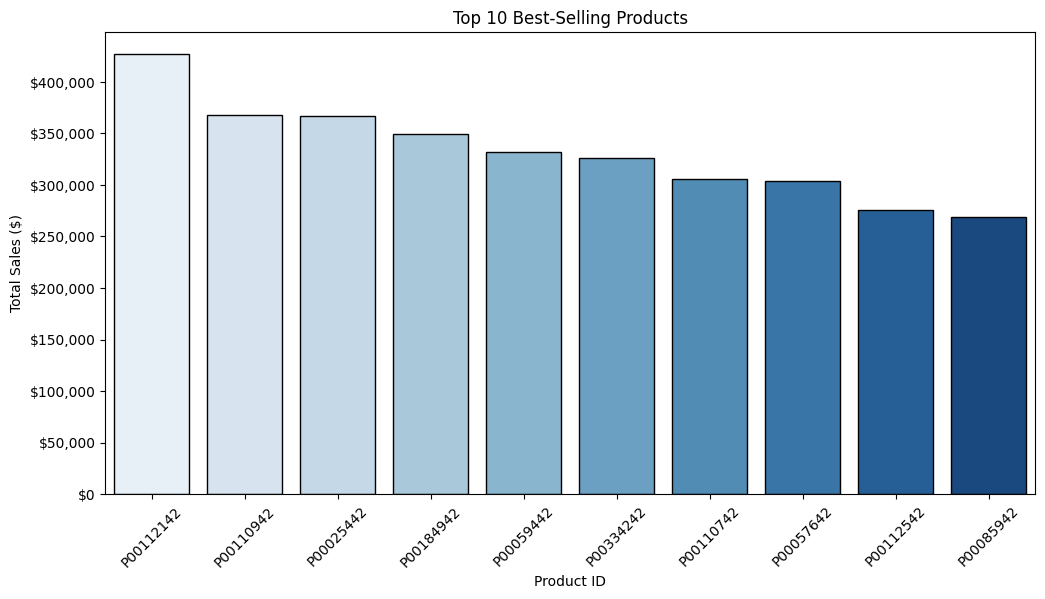

In [213]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="Blues", edgecolor="black")

# Labels & title
plt.xlabel("Product ID")
plt.ylabel("Total Sales ($)")
plt.title("Top 10 Best-Selling Products")
plt.xticks(rotation=45)

# Format Y-axis with commas for readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Show the plot
plt.show()

2. Top 10 Spenders. User_ID 1000889 spent $602,921.00. 

In [214]:
# Group data by User_ID and total purchase amounts
total_spend = df.groupby("User_ID")["Purchase"].sum().sort_values(ascending=False).head(10)  # Top 10 spenders

print("Top 10 spenders:\n", total_spend)

Top 10 spenders:
 User_ID
1000889    602921
1000549    478817
1000869    430517
1000424    405469
1000524    365474
1001015    358664
1000195    357676
1000550    347778
1000053    345746
1000352    337288
Name: Purchase, dtype: int64


Bar Chart for Top 10 spenders. 

AttributeError: This method only works with the ScalarFormatter

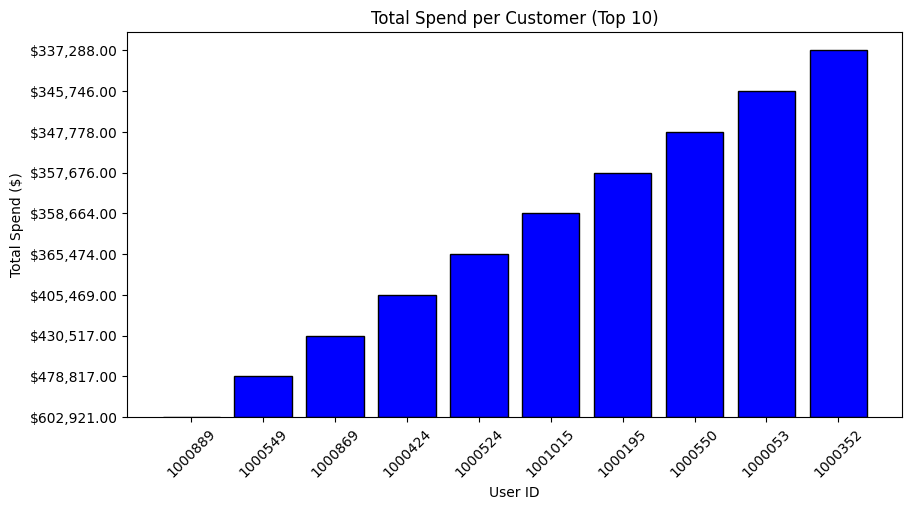

In [220]:
# Bar chart with blue bars and black borders
plt.figure(figsize=(10, 5))
plt.bar(total_spend.index.astype(str), total_spend.values, color="#0000FF", edgecolor="black")

# Labels & Title
plt.xlabel("User ID")
plt.ylabel("Total Spend ($)")
plt.title("Total Spend per Customer (Top 10)")
plt.xticks(rotation=45)

# Remove scientific notation on Y-axis and format for it to show full dollar amounts
plt.ticklabel_format(style='plain', axis='y') 
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

# Format Y-axis to show full dollar amounts with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Show plot
plt.show()

3. Average spent by Age

In [ ]:
avg_spend_age = df1.groupby("Age")["Purchase"].mean().round(0).astype(int)
print("Average spend by age group (rounded):\n", avg_spend_age)

Average spend by age group (rounded):
 Age
9     8933
21    9170
30    9253
40    9331
48    9209
53    9535
55    9336
Name: Purchase, dtype: int64


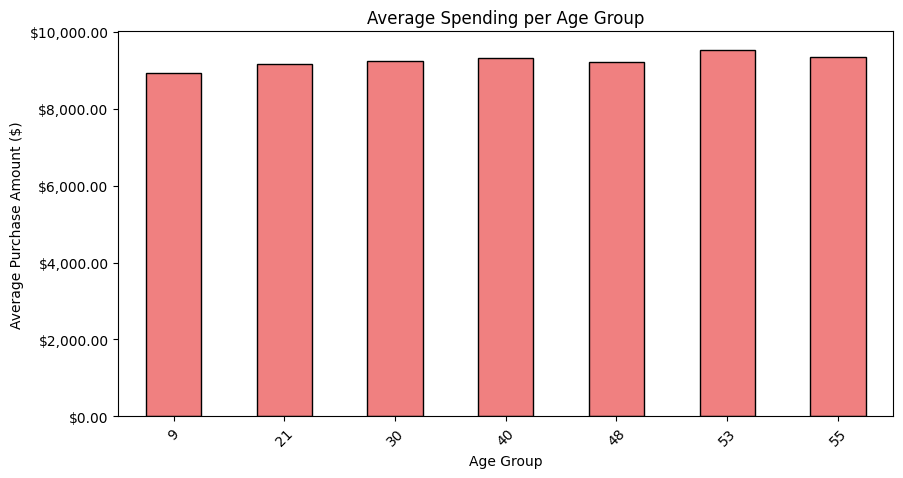

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 5))
avg_spend_age.plot(kind="bar", color="lightcoral", edgecolor="black")

# Labels & Title
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount ($)")
plt.title("Average Spending per Age Group")
plt.xticks(rotation=45)

# Y-axis as dollars with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.2f}"))

# Show plot
plt.show()

4. Holiday vs Non Holiday spending 

In [ ]:
sales_holiday = df.groupby("Holiday_Flag")["Weekly_Sales"].sum()

# round the sales to the nearest integer
sales_holiday = sales_holiday.round().astype(int)

print("Total sales during holidays:\n", sales_holiday)

Total sales during holidays:
 Holiday_Flag
0.0    6231919429
1.0     505299550
Name: Weekly_Sales, dtype: int64


Create Pie Chart 

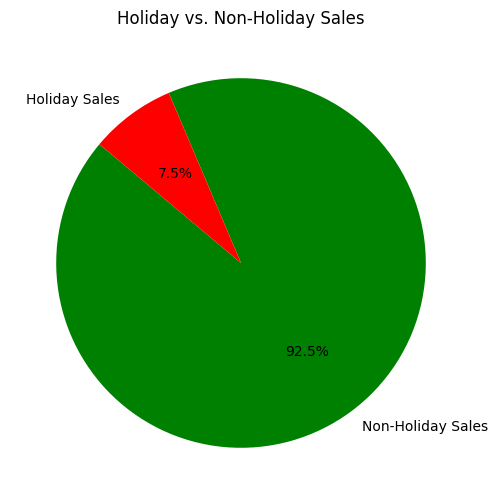

In [ ]:
labels = ["Non-Holiday Sales", "Holiday Sales"]
colors = ["green", "red"]

plt.figure(figsize=(6, 6))
plt.pie(sales_holiday, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Holiday vs. Non-Holiday Sales")
plt.show()